In [1]:
import sys
import copy
sys.path.insert(0, "..")
from classes.atom_classes.atom import Atom
from classes.atom_classes.atom_collection import Atom_Collection
from classes.atom_classes.atom_collection_plotter import Atom_Collection_Plotter, Animator
from classes.descriptors import PairDistances, CoordinationNumbers, ConnectivityGraphSpectrum, CoulombMatrixSpectrum
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
plt.rc('animation', html='jshtml')

In [2]:
pos_flat = np.loadtxt('lj10clusters.txt')
positions = pos_flat.reshape(-1,pos_flat.shape[1]//2,2)
atom_cols = [Atom_Collection([Atom(position=pos) for pos in poses]) for poses in positions]
descriptor_types = [PairDistances(), CoordinationNumbers(), ConnectivityGraphSpectrum(), CoulombMatrixSpectrum()]

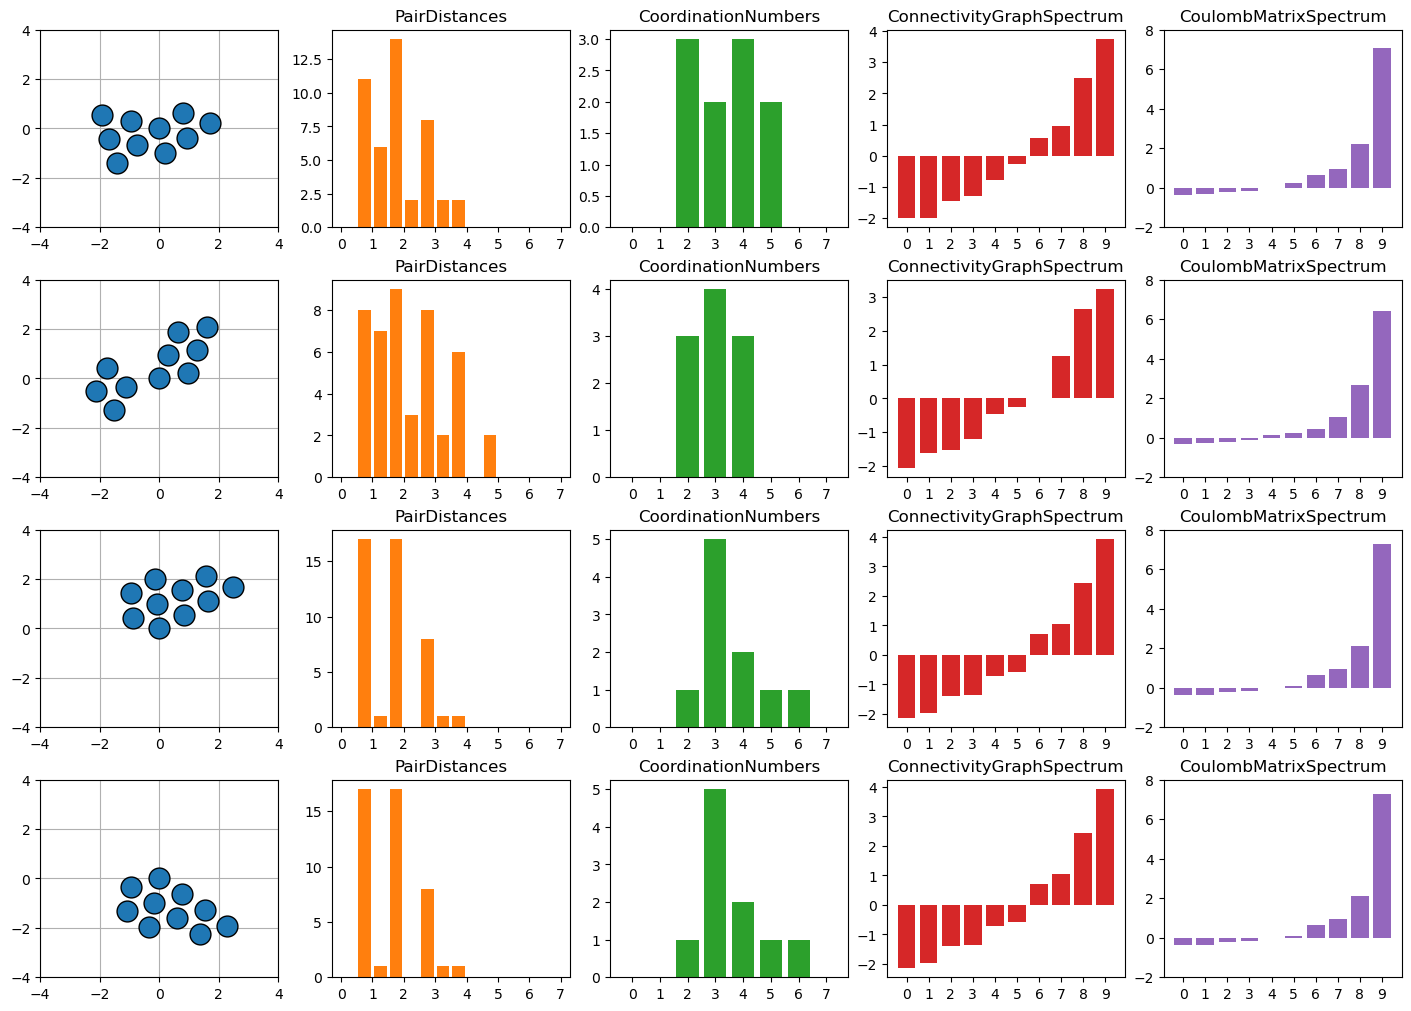

In [6]:
fig, axs = plt.subplots(4, 5, figsize=(14,10), layout="constrained")
atom_plotter = Atom_Collection_Plotter(markersize=15)

for atom_col, ax_row in zip(atom_cols, axs):
    atom_plotter(atom_col=atom_col, ax=ax_row[0])
    ax_row[0].set_xlim([-4,4])
    ax_row[0].set_ylim([-4,4])
    ax_row[0].grid()
    for descriptor_type, ax in zip(descriptor_types, ax_row[1::]):
        descriptor_type.plot(atom_col=atom_col, ax=ax)
    atom_col.reset_plot_axes()